In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/.kaggle"

In [2]:
!kaggle datasets download -d edumagalhaes/quality-prediction-in-a-mining-process

Dataset URL: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process
License(s): CC0-1.0
 96% 49.0M/50.9M [00:00<00:00, 108MB/s]
100% 50.9M/50.9M [00:00<00:00, 101MB/s]


In [3]:
!unzip quality-prediction-in-a-mining-process.zip

Archive:  quality-prediction-in-a-mining-process.zip
  inflating: MiningProcess_Flotation_Plant_Database.csv  


In [4]:
!ls

drive					    quality-prediction-in-a-mining-process.zip
MiningProcess_Flotation_Plant_Database.csv  sample_data


Importando bibliotecas

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
raw_data = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv',decimal=',')
raw_data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [7]:
datidx = pd.to_datetime(raw_data['date'])
raw_data.index = datidx
raw_data.drop('date',axis=1,inplace= True)

In [8]:
df= raw_data[raw_data['% Silica Concentrate'].shift() != raw_data['% Silica Concentrate']]
df_resampled = df.resample('H').last().round(2)
df_resampled


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3019.53,557.43,395.71,10.07,1.74,249.21,253.24,250.58,...,250.88,457.40,432.96,424.95,443.56,502.26,446.37,523.34,66.91,1.31
2017-03-10 02:00:00,55.20,16.98,3170.41,539.67,399.70,10.16,1.67,249.29,248.27,248.31,...,249.77,462.60,488.72,441.67,433.63,448.48,480.87,489.38,67.06,1.11
2017-03-10 03:00:00,55.20,16.98,3365.65,573.52,399.02,10.09,1.71,249.38,253.31,252.09,...,249.06,456.44,440.43,456.62,432.74,464.33,445.95,432.91,66.97,1.27
2017-03-10 04:00:00,55.20,16.98,2693.75,592.13,409.20,9.95,1.72,248.30,251.91,251.12,...,249.24,459.25,480.11,453.81,433.88,438.64,421.97,408.19,66.75,1.36
2017-03-10 05:00:00,55.20,16.98,2352.22,601.81,398.14,9.84,1.76,248.95,246.31,248.07,...,252.69,558.54,548.28,551.96,561.72,543.07,529.26,514.24,66.63,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,49.75,23.20,2888.06,494.99,376.47,9.28,1.67,317.06,297.75,301.68,...,302.33,577.94,489.96,505.00,440.59,481.30,434.70,401.80,65.05,1.65
2017-09-09 20:00:00,49.75,23.20,4218.57,492.03,378.63,9.16,1.65,302.08,301.35,300.54,...,342.62,412.49,510.39,342.20,371.88,594.52,443.69,375.04,64.83,1.71
2017-09-09 21:00:00,49.75,23.20,3159.10,520.99,381.47,9.58,1.74,296.06,298.48,299.08,...,332.39,401.46,533.41,390.06,395.46,587.86,489.41,504.98,64.29,1.80


In [9]:
df_resampled['% Silica Concentrate delay'] = df_resampled['% Silica Concentrate'].shift(freq= '-2h')
df_resampled

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,% Silica Concentrate delay
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3019.53,557.43,395.71,10.07,1.74,249.21,253.24,250.58,...,457.40,432.96,424.95,443.56,502.26,446.37,523.34,66.91,1.31,1.27
2017-03-10 02:00:00,55.20,16.98,3170.41,539.67,399.70,10.16,1.67,249.29,248.27,248.31,...,462.60,488.72,441.67,433.63,448.48,480.87,489.38,67.06,1.11,1.36
2017-03-10 03:00:00,55.20,16.98,3365.65,573.52,399.02,10.09,1.71,249.38,253.31,252.09,...,456.44,440.43,456.62,432.74,464.33,445.95,432.91,66.97,1.27,1.34
2017-03-10 04:00:00,55.20,16.98,2693.75,592.13,409.20,9.95,1.72,248.30,251.91,251.12,...,459.25,480.11,453.81,433.88,438.64,421.97,408.19,66.75,1.36,1.15
2017-03-10 05:00:00,55.20,16.98,2352.22,601.81,398.14,9.84,1.76,248.95,246.31,248.07,...,558.54,548.28,551.96,561.72,543.07,529.26,514.24,66.63,1.34,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,49.75,23.20,2888.06,494.99,376.47,9.28,1.67,317.06,297.75,301.68,...,577.94,489.96,505.00,440.59,481.30,434.70,401.80,65.05,1.65,1.80
2017-09-09 20:00:00,49.75,23.20,4218.57,492.03,378.63,9.16,1.65,302.08,301.35,300.54,...,412.49,510.39,342.20,371.88,594.52,443.69,375.04,64.83,1.71,1.96
2017-09-09 21:00:00,49.75,23.20,3159.10,520.99,381.47,9.58,1.74,296.06,298.48,299.08,...,401.46,533.41,390.06,395.46,587.86,489.41,504.98,64.29,1.80,1.71


In [10]:
df_resampled.dropna(inplace=True)
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3490 entries, 2017-03-10 01:00:00 to 2017-09-09 21:00:00
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   3490 non-null   float64
 1   % Silica Feed                 3490 non-null   float64
 2   Starch Flow                   3490 non-null   float64
 3   Amina Flow                    3490 non-null   float64
 4   Ore Pulp Flow                 3490 non-null   float64
 5   Ore Pulp pH                   3490 non-null   float64
 6   Ore Pulp Density              3490 non-null   float64
 7   Flotation Column 01 Air Flow  3490 non-null   float64
 8   Flotation Column 02 Air Flow  3490 non-null   float64
 9   Flotation Column 03 Air Flow  3490 non-null   float64
 10  Flotation Column 04 Air Flow  3490 non-null   float64
 11  Flotation Column 05 Air Flow  3490 non-null   float64
 12  Flotation Column 06 Air Fl

In [11]:
features = [
    'Amina Flow',
    'Ore Pulp pH',
    'Flotation Column 01 Air Flow',
    'Flotation Column 02 Air Flow',
    'Flotation Column 03 Air Flow',
    'Flotation Column 04 Level',
    'Flotation Column 05 Level',
    'Flotation Column 06 Level',
    'Flotation Column 07 Level',
]

target = ['% Silica Concentrate delay']

df_model = df_resampled[features + target]
df_model

,Amina Flow,Ore Pulp pH,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate delay
date,,,,,,,,,,
2017-03-10 01:00:00,557.43,10.07,249.21,253.24,250.58,443.56,502.26,446.37,523.34,1.27
2017-03-10 02:00:00,539.67,10.16,249.29,248.27,248.31,433.63,448.48,480.87,489.38,1.36
2017-03-10 03:00:00,573.52,10.09,249.38,253.31,252.09,432.74,464.33,445.95,432.91,1.34
2017-03-10 04:00:00,592.13,9.95,248.30,251.91,251.12,433.88,438.64,421.97,408.19,1.15
2017-03-10 05:00:00,601.81,9.84,248.95,246.31,248.07,561.72,543.07,529.26,514.24,2.76
...,...,...,...,...,...,...,...,...,...,...
2017-09-09 17:00:00,509.37,9.13,299.97,305.20,302.89,427.58,444.20,404.47,437.27,1.65
2017-09-09 18:00:00,497.44,9.43,299.47,305.75,296.63,383.28,457.73,390.50,356.67,1.71
2017-09-09 19:00:00,494.99,9.28,317.06,297.75,301.68,440.59,481.30,434.70,401.80,1.80


In [40]:
x=df_model[features]
y=df_model[target]

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [41]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(2233, 9) (2233, 1)
(559, 9) (559, 1)
(698, 9) (698, 1)


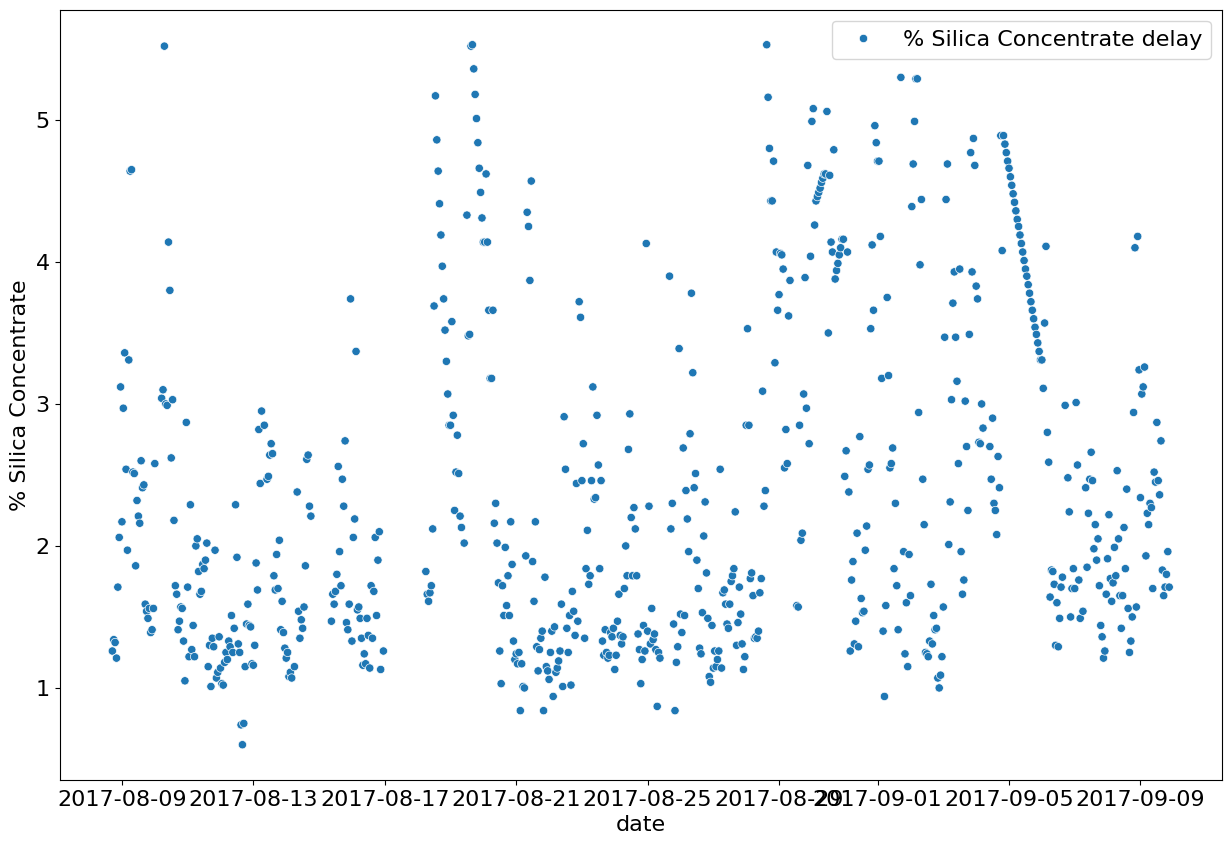

In [44]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=y_test)

plt.ylabel('% Silica Concentrate')
plt.show()

MAE =  0.884935643642188
MSE =  1.2339935282939332
R2 =  -0.033463279066596296


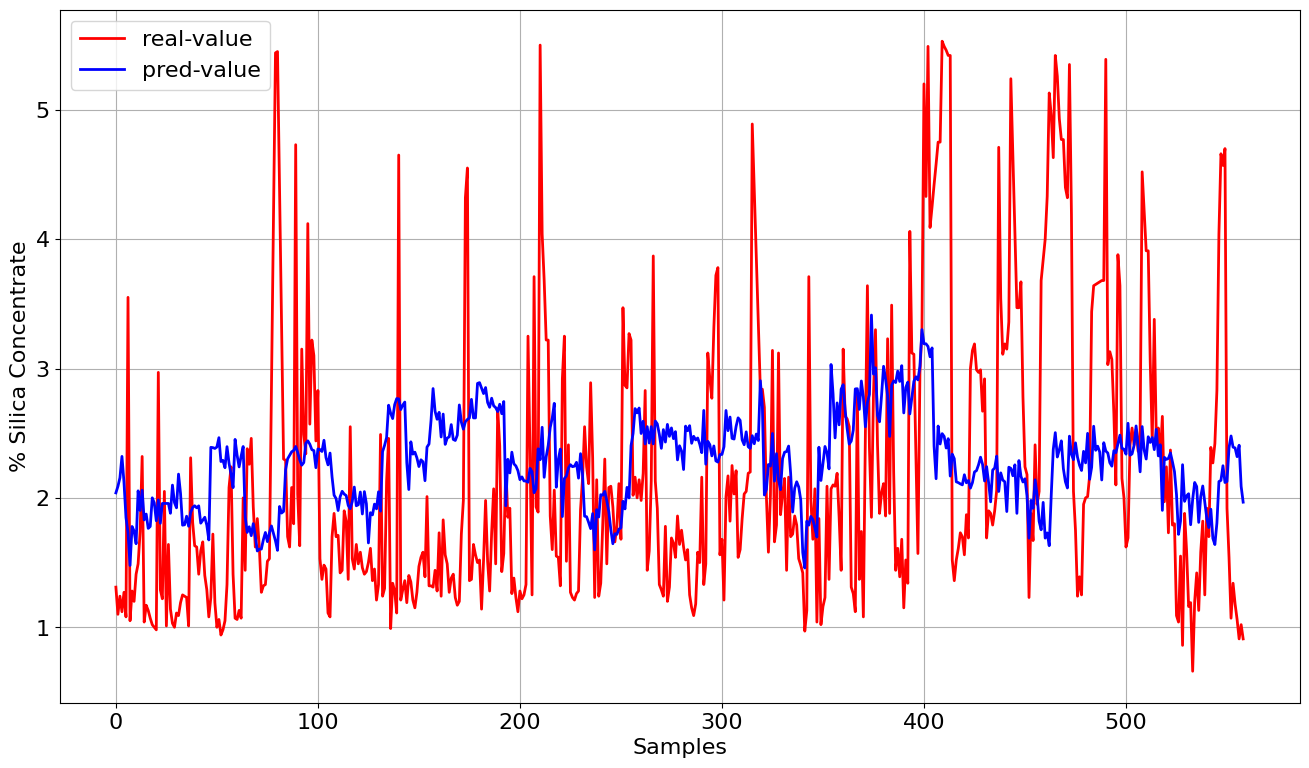

In [42]:
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)
prediction = model_lin.predict(x_val)

print("MAE = ", mean_absolute_error(y_val, prediction))
print("MSE = ", mean_squared_error(y_val, prediction))
print("R2 = ", r2_score(y_val, prediction))

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Modelo Polinomial

MAE =  1.0227188224058361
MSE =  1.8747059834908268
R2 =  -0.5700566887598024


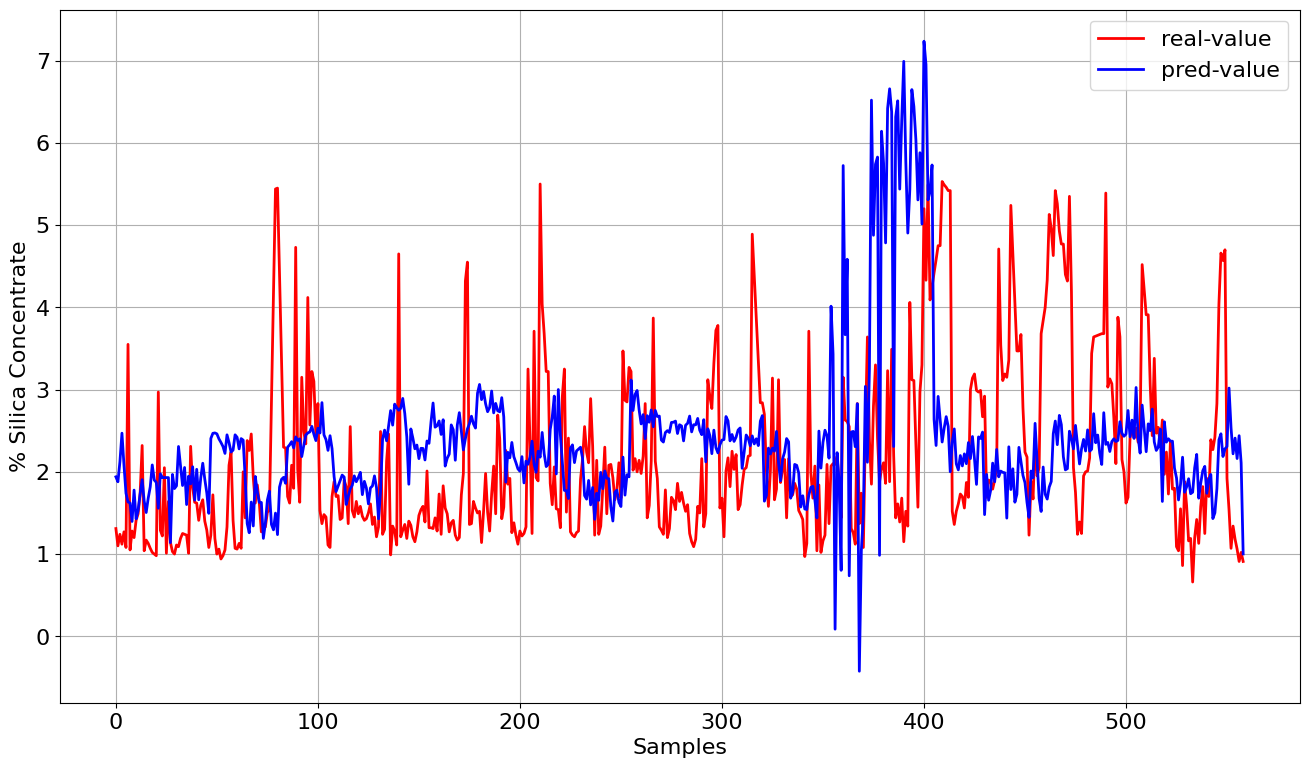

In [43]:
poly = PolynomialFeatures(degree=2)  # Degree of the polynomial
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)

model_poly = LinearRegression()
model_poly.fit(x_train_poly,y_train)
prediction = model_poly.predict(x_val_poly)

print("MAE = ", mean_absolute_error(y_val, prediction))
print("MSE = ", mean_squared_error(y_val, prediction))
print("R2 = ", r2_score(y_val, prediction))

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Support Vecto Machine - SVR

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.8229658827925059
MSE =  1.2738880268338626
R2 =  -0.06687471788896615


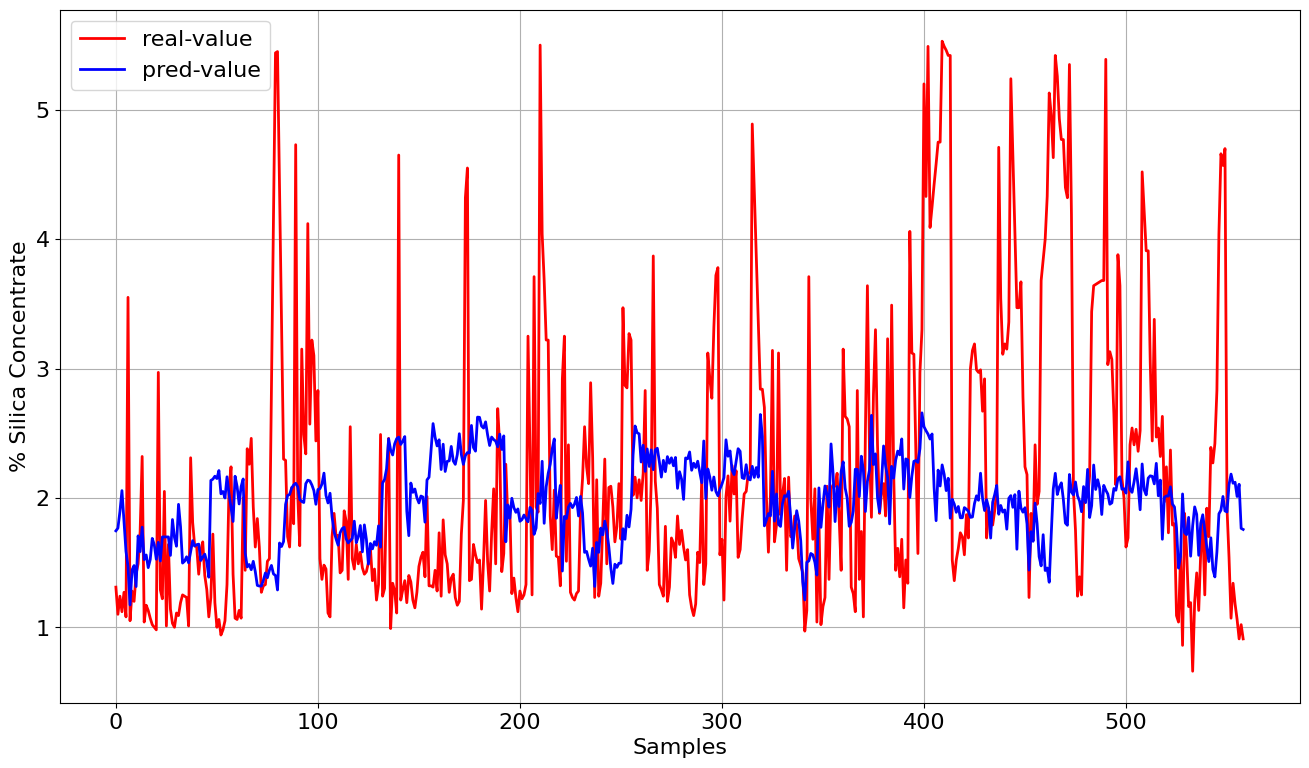

In [46]:
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train,y_train)
prediction = svr_lin.predict(x_val)

print("MAE = ", mean_absolute_error(y_val, prediction))
print("MSE = ", mean_squared_error(y_val, prediction))
print("R2 = ", r2_score(y_val, prediction))

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.8374936948955178
MSE =  1.3738653134452643
R2 =  -0.15060518493318953


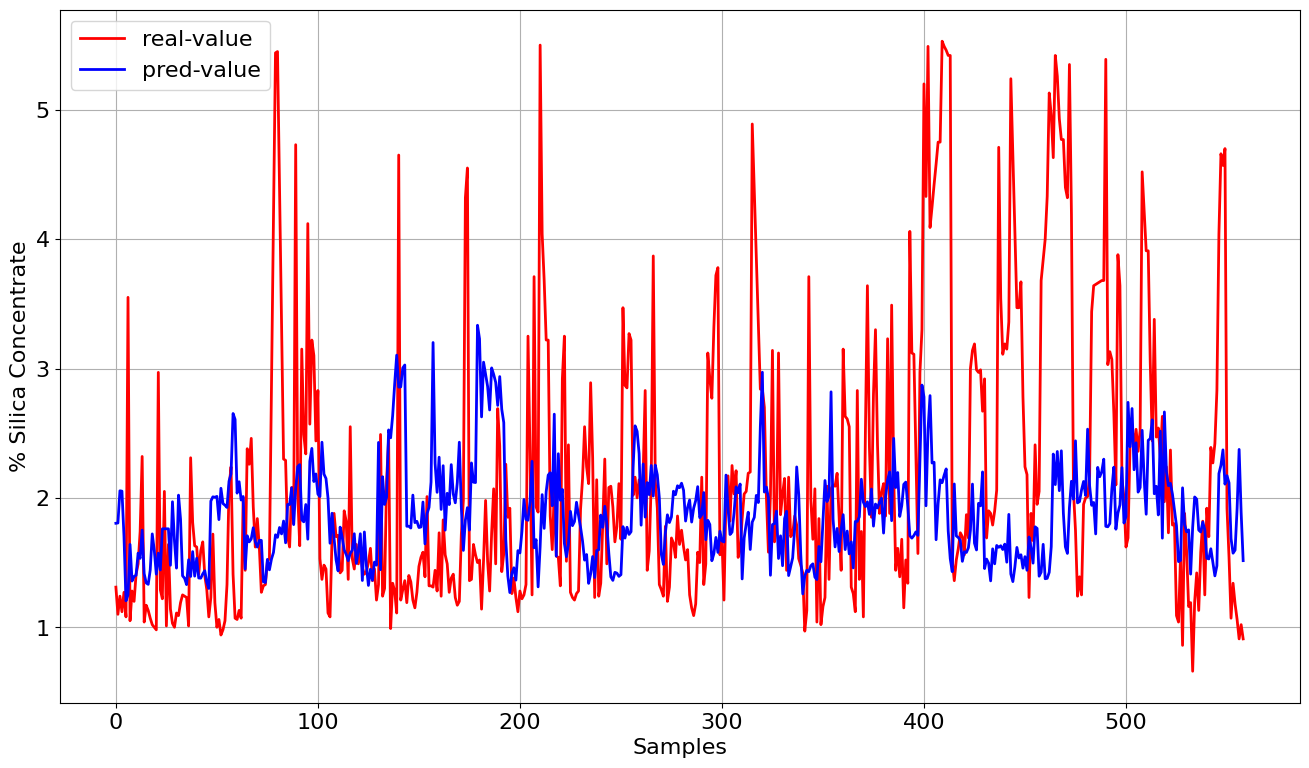

In [57]:
svr_rbf1 = SVR(kernel='rbf')
svr_rbf1.fit(x_train,y_train)
prediction = svr_rbf1.predict(x_val)

print("MAE = ", mean_absolute_error(y_val, prediction))
print("MSE = ", mean_squared_error(y_val, prediction))
print("R2 = ", r2_score(y_val, prediction))

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.82342642815199
MSE =  1.2660692128098876
R2 =  -0.06032650106743964


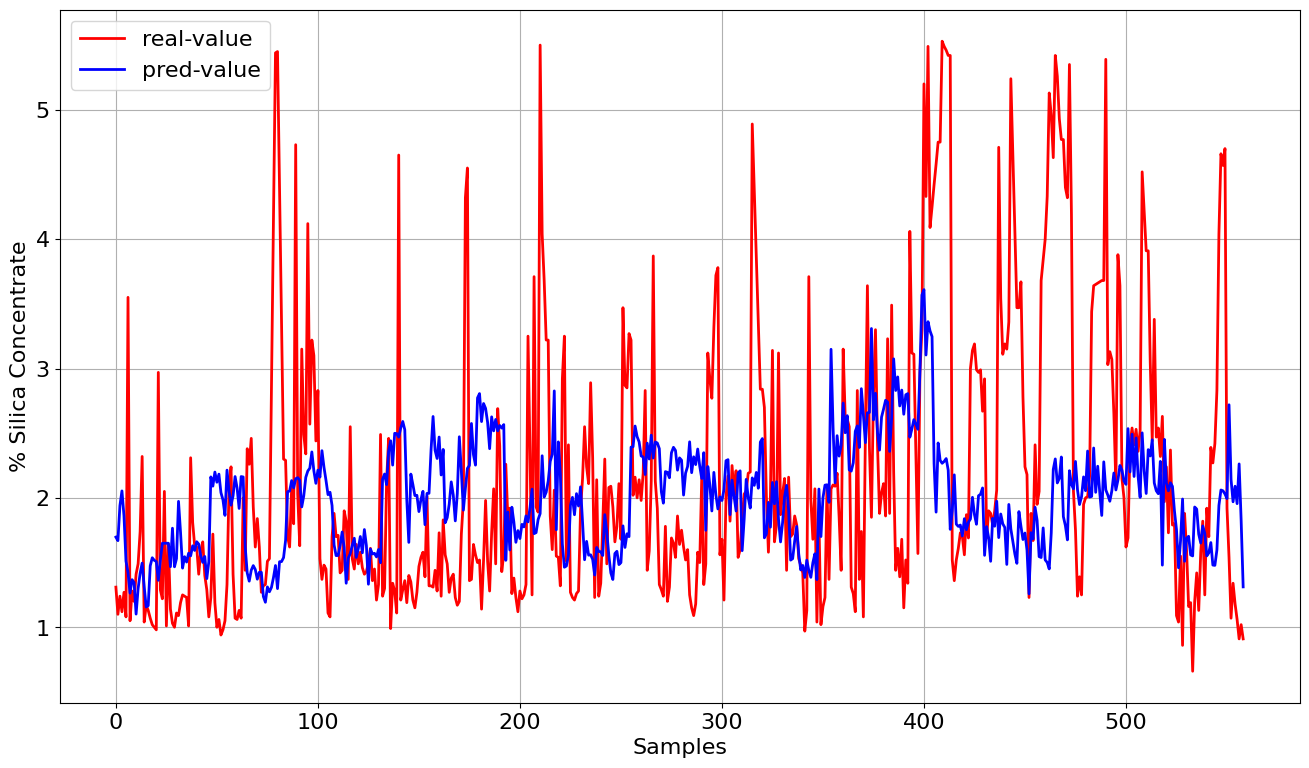

In [58]:
svr_rbf2 = SVR(kernel='rbf', C=100.0, gamma=0.1)
svr_rbf2.fit(x_train,y_train)
prediction = svr_rbf2.predict(x_val)

print("MAE = ", mean_absolute_error(y_val, prediction))
print("MSE = ", mean_squared_error(y_val, prediction))
print("R2 = ", r2_score(y_val, prediction))

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE =  0.8859422540250446
MSE =  1.2424317275359567
R2 =  -0.040530227845602784


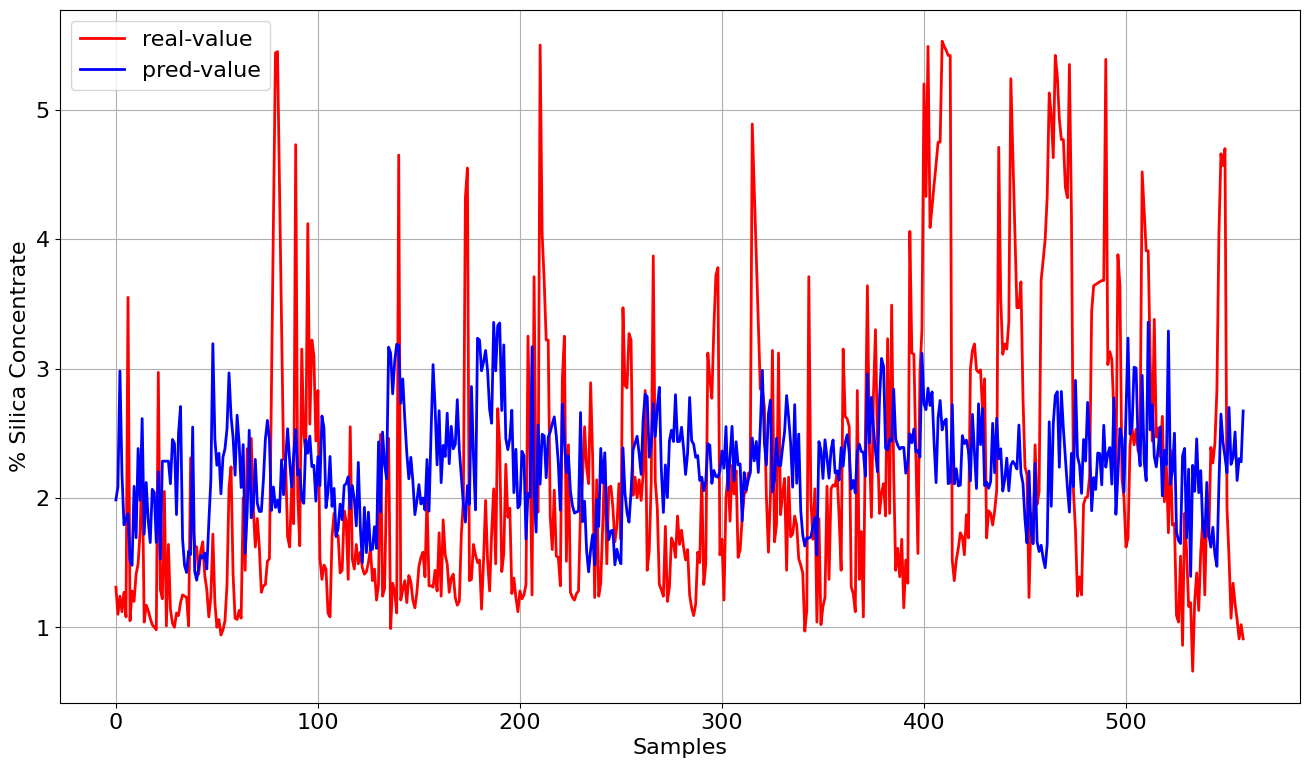

In [56]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(x_train,y_train)
prediction = rf.predict(x_val)

print("MAE = ", mean_absolute_error(y_val, prediction))
print("MSE = ", mean_squared_error(y_val, prediction))
print("R2 = ", r2_score(y_val, prediction))

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.867751000577643
MSE =  1.2071370444411
R2 =  -0.010971110971419007


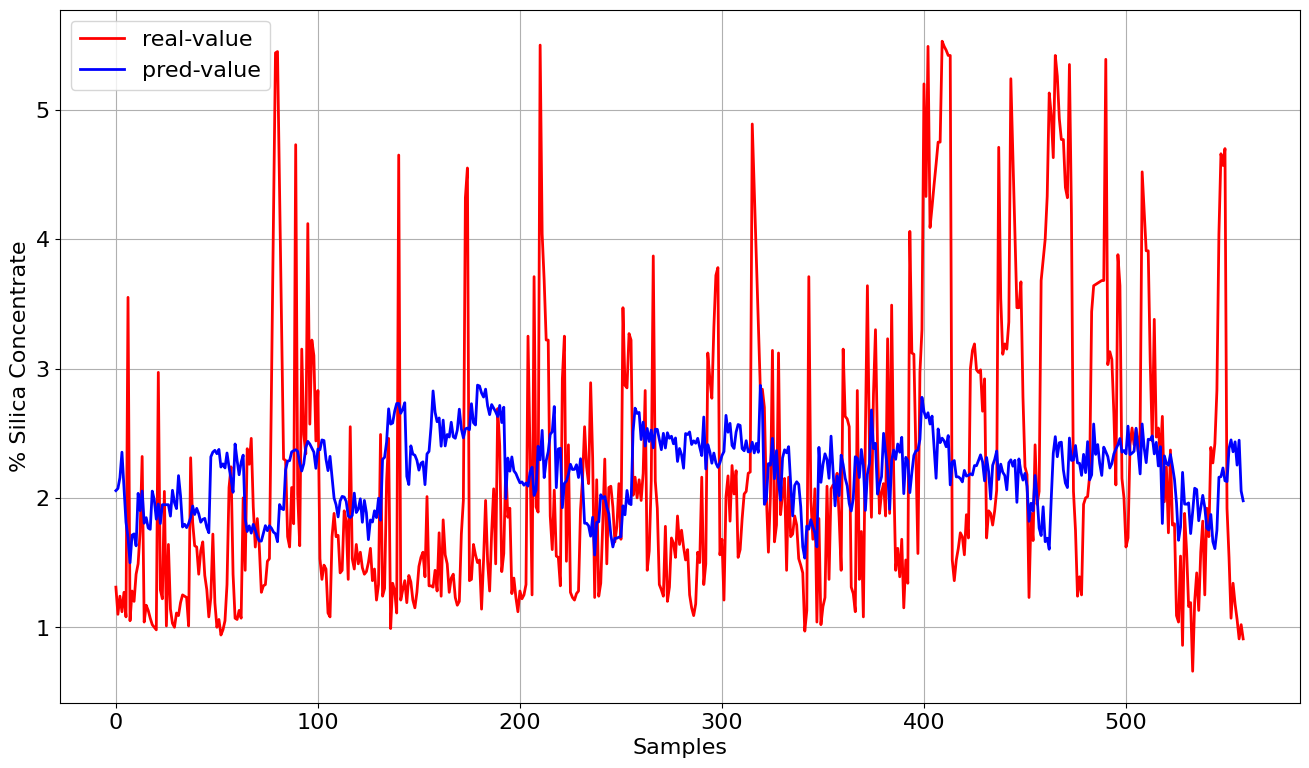

In [65]:
mlp = MLPRegressor(random_state=1, max_iter=1000)
mlp.fit(x_train,y_train)
prediction = mlp.predict(x_val)

print("MAE = ", mean_absolute_error(y_val, prediction))
print("MSE = ", mean_squared_error(y_val, prediction))
print("R2 = ", r2_score(y_val, prediction))

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

TESTE


MAE =  0.8814909517622637
MSE =  1.418188854770016
R2 =  -0.059927873626250516


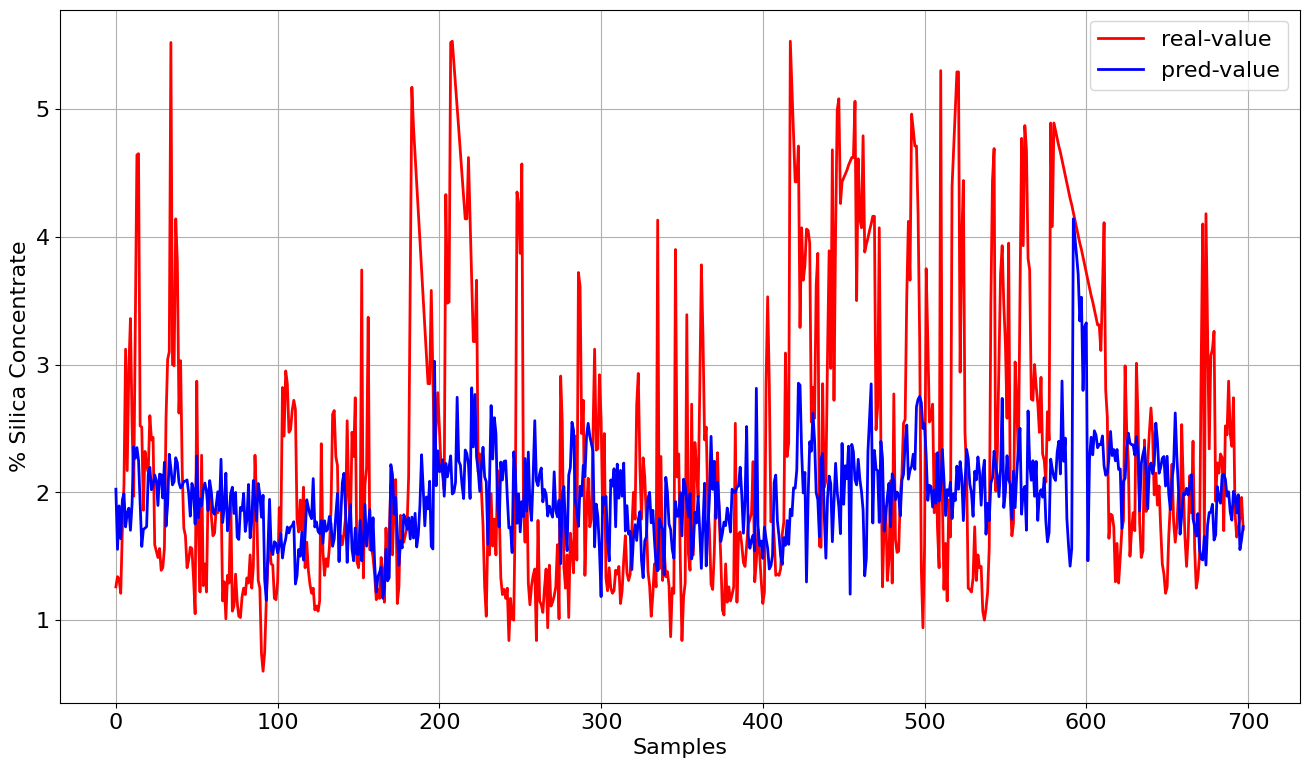

In [60]:
prediction = mlp.predict(x_test)

print("MAE = ", mean_absolute_error(y_test, prediction))
print("MSE = ", mean_squared_error(y_test, prediction))
print("R2 = ", r2_score(y_test, prediction))

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_test)), y_test,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_test)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()